In [2]:
#inspired from https://github.com/thomasdubdub/covid-france/blob/master/demo-covid.ipynb
import requests
import zipfile
import io
import pandas as pd
import geopandas as gpd
#import contextily as ctx


In [3]:
local_path = "\\work/"
filter_dep = ["971", "972", "973", "974", "976"]  # only metropolitan France
figsize = (15, 15)
tile_zoom = 7
frame_duration = 500  # in ms
# https://www.data.gouv.fr/fr/datasets/contours-des-departements-francais-issus-d-openstreetmap/
r = requests.get("http://osm13.openstreetmap.fr/~cquest/openfla/export/departements-20140306-5m-shp.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(path=local_path)
filenames = [
    y
    for y in sorted(z.namelist())
    for ending in ["dbf", "prj", "shp", "shx"]
    if y.endswith(ending)
]

In [37]:
dbf, prj, shp, shx = [filename for filename in filenames]
fr = gpd.read_file(local_path + shp)  #  + encoding="utf-8" if needed
fr.crs = "epsg:4326"  # {'init': 'epsg:4326'}
met = fr.query("code_insee not in @filter_dep")
#met.set_index("code_insee", inplace=True)
met = met[["code_insee","geometry"]]

ValueError: Unable to parse string "2A" at position 28

In [5]:
#Load the map tile with contextily
w, s, e, n = met.total_bounds
#bck, ext = ctx.bounds2img(w, s, e, n, zoom=tile_zoom, ll=True)

In [6]:
df = pd.read_excel('CepiDC_cancer_deaths.xlsx')

In [7]:
df.head()

,Annee,Dep,CodeCIM,Libelle,Sexe,Total,Age0,Age1_4,Age5_14,Age15_24,Age25_34,Age35_44,Age45_54,Age55_64,Age65_74,Age75_84,Age85_94,Age95plus
0,1981,1,140-239,Tumeurs,M,528,1,1,2,3,5,22,51,104,134,169,36,0
1,1981,1,140-239,Tumeurs,F,347,1,3,2,1,4,7,26,51,81,120,49,2
2,1981,1,140-239,Tumeurs,T,875,2,4,4,4,9,29,77,155,215,289,85,2
3,1981,1,140 -149,"Tumeur maligne de la lèvre, de la cavité bucca...",M,42,0,0,0,0,0,4,14,8,10,5,1,0
4,1981,1,140 -149,"Tumeur maligne de la lèvre, de la cavité bucca...",F,3,0,0,0,0,0,0,0,0,0,0,3,0


In [14]:
df2=df[df['Libelle']=='Tumeurs']
df3=df2[df2['Annee']==1981]
df3

,Annee,Dep,CodeCIM,Libelle,Sexe,Total,Age0,Age1_4,Age5_14,Age15_24,Age25_34,Age35_44,Age45_54,Age55_64,Age65_74,Age75_84,Age85_94,Age95plus
0,1981,1,140-239,Tumeurs,M,528,1,1,2,3,5,22,51,104,134,169,36,0
1,1981,1,140-239,Tumeurs,F,347,1,3,2,1,4,7,26,51,81,120,49,2
2,1981,1,140-239,Tumeurs,T,875,2,4,4,4,9,29,77,155,215,289,85,2
63,1981,2,140-239,Tumeurs,M,823,0,0,3,3,6,24,108,164,239,221,52,3
64,1981,2,140-239,Tumeurs,F,513,1,0,3,2,6,15,32,79,133,166,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1981,94,140-239,Tumeurs,F,1086,2,2,3,5,13,42,113,179,233,331,153,10
5861,1981,94,140-239,Tumeurs,T,2607,2,3,8,14,33,76,331,519,667,690,250,14
5922,1981,95,140-239,Tumeurs,M,1074,0,2,3,7,9,40,173,241,251,276,70,2
5923,1981,95,140-239,Tumeurs,F,669,1,2,2,5,8,20,64,119,137,201,106,4


In [59]:
df3["code_insee"]=df3["Dep"].astype(str).apply(lambda x: x.zfill(2))

C:\Users\edebo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df4=pd.merge(met,df3, on="code_insee")


In [62]:

gdf = gpd.GeoDataFrame(df4, crs={"init": "epsg:4326"})

C:\Users\edebo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\edebo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  """Entry point for launching an IPython kernel.


In [63]:
gdf

,code_insee,geometry,Annee,Dep,CodeCIM,Libelle,Sexe,Total,Age0,Age1_4,...,Age25_34,Age35_44,Age45_54,Age55_64,Age65_74,Age75_84,Age85_94,Age95plus,code,code2
0,01,"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",1981,01,140-239,Tumeurs,M,528,1,1,...,5,22,51,104,134,169,36,0,0,0
1,01,"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",1981,01,140-239,Tumeurs,F,347,1,3,...,4,7,26,51,81,120,49,2,0,0
2,01,"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",1981,01,140-239,Tumeurs,T,875,2,4,...,9,29,77,155,215,289,85,2,0,0
3,02,"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",1981,02,140-239,Tumeurs,M,823,0,0,...,6,24,108,164,239,221,52,3,0,0
4,02,"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",1981,02,140-239,Tumeurs,F,513,1,0,...,6,15,32,79,133,166,75,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,94,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",1981,94,140-239,Tumeurs,F,1086,2,2,...,13,42,113,179,233,331,153,10,0,0
278,94,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",1981,94,140-239,Tumeurs,T,2607,2,3,...,33,76,331,519,667,690,250,14,0,0
279,95,"POLYGON ((1.79674 49.07196, 1.79719 49.07144, ...",1981,95,140-239,Tumeurs,M,1074,0,2,...,9,40,173,241,251,276,70,2,0,0
280,95,"POLYGON ((1.79674 49.07196, 1.79719 49.07144, ...",1981,95,140-239,Tumeurs,F,669,1,2,...,8,20,64,119,137,201,106,4,0,0


In [64]:
gdf_3857 = gdf.to_crs(epsg=3857)

Text(0.5, 1.0, 'hello')

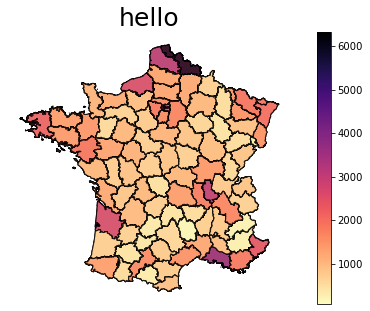

In [83]:
import matplotlib
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(9,5))
gdf.plot(
        column="Total",  # Number of people currently hospitalized
        ax=ax,
        alpha=0.75,
        edgecolor="k",
        legend=True,
        cmap=matplotlib.cm.get_cmap("magma_r"),
    )
ax.set_axis_off()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("hello", fontsize=25)


In [75]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


<AxesSubplot:>

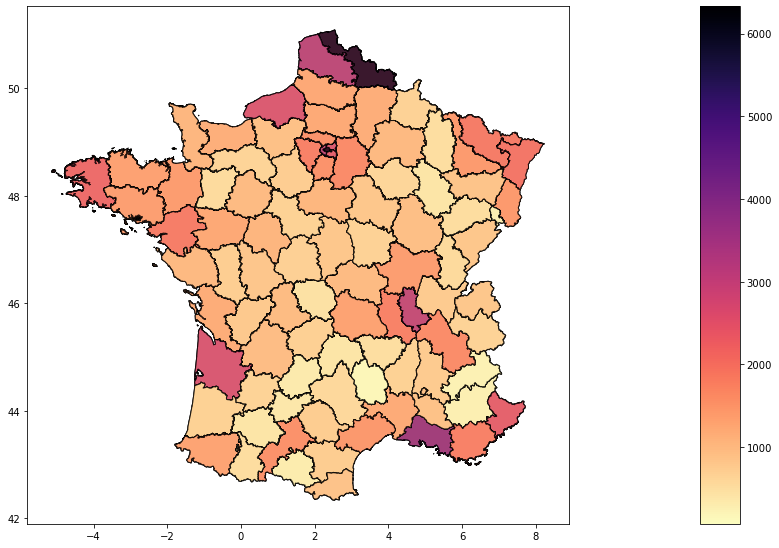

In [77]:
f, ax = plt.subplots(figsize=figsize)
divider = make_axes_locatable(ax)
cax = divider.append_axes(
        "right", size="5%", pad=0.1
    )  # GeoPandas trick to adjust the legend bar
gdf.plot(
        column="Total",  # Number of people currently hospitalized
        ax=ax,
        cax=cax,
        alpha=0.75,
        edgecolor="k",
        legend=True,
        cmap=matplotlib.cm.get_cmap("magma_r"),
    )
